#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
# import seaborn as sns

In [29]:
vax = pd.read_csv(os.getcwd() + '/Data/us_state_vaccinations.csv')

mass_vax = vax[vax['location'] == 'Massachusetts'].copy()  #.dropna()
mass_vax['date'] = pd.to_datetime(mass_vax['date'])

mass_vax.shape

(100, 14)

In [30]:
mass_vax.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
2900,2021-01-12,Massachusetts,204082.0,476025.0,184984.0,0.28,2.96,19073.0,2.68,6.91,NaN,NaN,NaN,0.429
2901,2021-01-13,Massachusetts,217443.0,656850.0,192619.0,0.36,3.15,24789.0,2.79,9.53,13361.0,13361.0,1938.0,0.331
2902,2021-01-14,Massachusetts,233476.0,669225.0,204481.0,NaN,3.39,NaN,2.97,9.71,16033.0,14697.0,2132.0,0.349
2903,2021-01-15,Massachusetts,257175.0,669325.0,222109.0,0.51,3.73,34885.0,3.22,9.71,23699.0,17698.0,2568.0,0.384
2904,2021-01-16,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15425.5,17130.0,2485.0,NaN


In [4]:
xlsx = pd.read_excel(os.getcwd() + '/Data/covid-19-raw-data-4-20-2021.xlsx', sheet_name = ['CasesByDate (Test Date)', 'DateofDeath', 'Hospitalization from Hospitals', 'TestingByDate (Test Date)'], engine = 'openpyxl')

In [5]:
cases, deaths, hosptl, tests = xlsx['CasesByDate (Test Date)'], xlsx['DateofDeath'], xlsx['Hospitalization from Hospitals'], xlsx['TestingByDate (Test Date)'].dropna(how = 'all').copy()
cases.shape, deaths.shape, hosptl.shape, tests.shape

((447, 4), (405, 6), (381, 9), (454, 25))

In [6]:
cases.head()

,Date,Positive Total,Positive New,7-day confirmed case average
0,2020-01-29,1,1,NaN
1,2020-01-30,1,0,NaN
2,2020-01-31,1,0,NaN
3,2020-02-01,1,0,NaN
4,2020-02-02,1,0,NaN


In [7]:
deaths.head()

,Date of Death,Confirmed Deaths,Confirmed Total,Probable Deaths,Probable Total,7-day confirmed death average
0,2020-03-10,0,0,0,0,NaN
1,2020-03-11,0,0,0,0,NaN
2,2020-03-12,0,0,0,0,NaN
3,2020-03-13,0,0,0,0,NaN
4,2020-03-14,0,0,0,0,NaN


In [8]:
hosptl.head()

,Date,Total number of COVID patients in hospital today,Net new number of COVID patients in hospital today,7 day average of COVID hospitalizations,ICU,Net New number ICU,Intubated,Net New number intubated,New COVID-19 hospitalizations
0,2020-04-04,1370,NaN,NaN,438,242,NaN,NaN,NaN
1,2020-04-05,1632,262.0,NaN,526,88,NaN,NaN,NaN
2,2020-04-06,1677,45.0,NaN,542,16,NaN,NaN,NaN
3,2020-04-07,1831,154.0,NaN,575,33,NaN,NaN,NaN
4,2020-04-08,2119,288.0,NaN,659,84,NaN,NaN,NaN


In [9]:
tests.head()

,Date,Molecular Total,Molecular New,Molecular Positive New,Antigen Positive New,Antigen New,Antigen Total,All Antigen Tests,All Positive Antigen Tests,First Molecular Test per person,...,All Molecular Tests_MA without Higher ED,All Positive Molecular Tests_MA without Higher ED,7-day weighted average positive test rate all molecular tests in MA,7-day weighted average positive test rate all molecular tests_Higher Ed ONLY,7-day weighted average positive test rate all molecular tests_MA without Higher ED,7-day average All Molecular Tests,7-day average daily molecular tests_MA without Higher ED,7-day average daily molecular tests_Higher ED ONLY,7-day average daily POSITIVE molecular tests_MA without Higher ED,7-day average daily POSITIVE molecular tests_Higher ED ONLY
0,2020-01-22,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,2.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Total cases over time

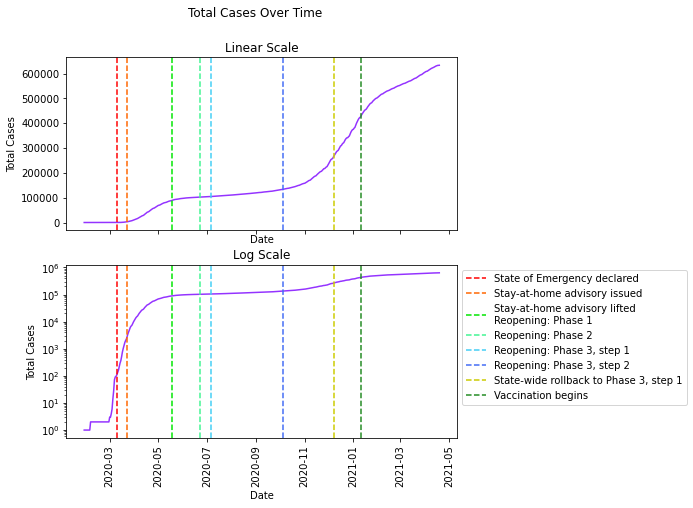

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (7, 7))
fig.suptitle('Total Cases Over Time')
# fig.subplots_adjust(hspace = 0.7)

ax1.plot(cases['Date'], cases['Positive Total'], color = '#9433ff')
ax1.axvline(pd.to_datetime('2020-03-10'), ls = '--', color = '#ff0000')
ax1.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#ff6600')
ax1.axvline(pd.to_datetime('2020-05-18'), ls = '--', color = '#00e600')
ax1.axvline(pd.to_datetime('2020-06-22'), ls = '--', color = '#42f593')
ax1.axvline(pd.to_datetime('2020-07-06'), ls = '--', color = '#42cef5')
ax1.axvline(pd.to_datetime('2020-10-05'), ls = '--', color = '#426cf5')
ax1.axvline(pd.to_datetime('2020-12-08'), ls = '--', color = '#cccc00')
ax1.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#228b22')
ax1.set_title('Linear Scale')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases')

ax2.plot(cases['Date'], cases['Positive Total'], color = '#9433ff')
ax2.axvline(pd.to_datetime('2020-03-10'), ls = '--', color = '#ff0000', label = 'State of Emergency declared')
ax2.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#ff6600', label = 'Stay-at-home advisory issued')
ax2.axvline(pd.to_datetime('2020-05-18'), ls = '--', color = '#00e600', label = 'Stay-at-home advisory lifted\nReopening: Phase 1')
ax2.axvline(pd.to_datetime('2020-06-22'), ls = '--', color = '#42f593', label = 'Reopening: Phase 2')
ax2.axvline(pd.to_datetime('2020-07-06'), ls = '--', color = '#42cef5', label = 'Reopening: Phase 3, step 1')
ax2.axvline(pd.to_datetime('2020-10-05'), ls = '--', color = '#426cf5', label = 'Reopening: Phase 3, step 2')
ax2.axvline(pd.to_datetime('2020-12-08'), ls = '--', color = '#cccc00', label = 'State-wide rollback to Phase 3, step 1')
ax2.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#228b22', label = 'Vaccination begins')
ax2.set_yscale('log')
ax2.set_title('Log Scale')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Cases')

plt.xticks(rotation = 90)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.show()
plt.close()

#### New positive cases

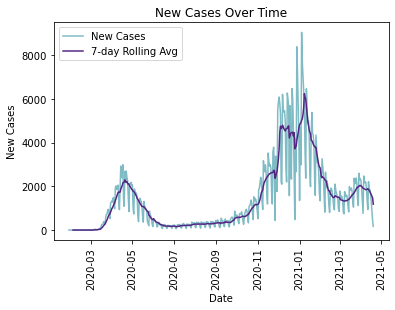

In [11]:
plt.plot(cases['Date'], cases['Positive New'], alpha = 0.5, color = '#00788c', label = 'New Cases')
plt.plot(cases['Date'], cases['Positive New'].rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

In [12]:
# plt.plot(cases['Date'].tail(60), cases['Positive New'].tail(60), alpha = 0.5, color = '#00788c', label = 'New Cases')
# plt.plot(cases['Date'].tail(60), cases['Positive New'].rolling(7).mean().tail(60), color = '#552583', label = '7-day Rolling Avg')
# plt.title('New Cases Over Time - Last 60 Days')
# plt.xlabel('Date')
# plt.ylabel('New Cases')
# plt.xticks(rotation = 90)
# plt.legend()
# plt.show()
# plt.close()

In [13]:
# # plt.plot(cases['Date'].tail(60), (cases['Positive New'].pct_change() * 100).tail(60), alpha = 0.5, color = '#00788c', label = 'Pct. Change')
# plt.plot(cases['Date'].tail(60), (cases['Positive New'].pct_change() * 100).rolling(7).mean().tail(60), color = '#552583', label = '7-day Rolling Avg')
# plt.title('New Cases Over Time - Percent Change in the Last 60 Days')
# plt.xlabel('Date')
# plt.ylabel('Percent Change')
# plt.xticks(rotation = 90)
# # plt.legend()
# plt.show()
# plt.close()

#### Case rates and testing

In [14]:
higher_ed_tests = tests[['Date', 'All Positive Molecular Tests_Higher Ed ONLY', 'All Molecular Tests_Higher Ed ONLY']].dropna()

higher_ed_tests.head()

,Date,All Positive Molecular Tests_Higher Ed ONLY,All Molecular Tests_Higher Ed ONLY
206,2020-08-15,3.0,1615.0
207,2020-08-16,7.0,1922.0
208,2020-08-17,11.0,11712.0
209,2020-08-18,4.0,12295.0
210,2020-08-19,11.0,12400.0


In [15]:
ex_higher_ed_tests = tests[['Date', 'All Positive Molecular Tests_MA without Higher ED', 'All Molecular Tests_MA without Higher ED']].dropna()

ex_higher_ed_tests.head()

,Date,All Positive Molecular Tests_MA without Higher ED,All Molecular Tests_MA without Higher ED
206,2020-08-15,183.0,12870.0
207,2020-08-16,136.0,9682.0
208,2020-08-17,464.0,28989.0
209,2020-08-18,452.0,27273.0
210,2020-08-19,396.0,26228.0


Positive test rate over time

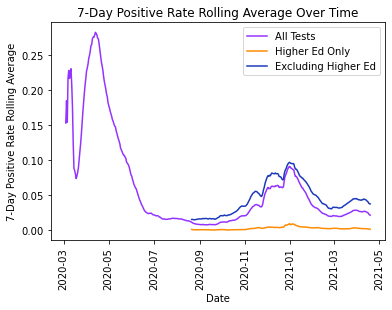

In [16]:
# plt.plot(tests['Date'], tests['All Positive Molecular Tests'] / tests['All Molecular Tests'], alpha = 0.5, color = '#00788c')
plt.plot(tests['Date'], (tests['All Positive Molecular Tests'] / tests['All Molecular Tests']).rolling(7).mean(), color = '#9433ff', label ='All Tests')
plt.plot(higher_ed_tests['Date'], (higher_ed_tests['All Positive Molecular Tests_Higher Ed ONLY'] / higher_ed_tests['All Molecular Tests_Higher Ed ONLY']).rolling(7).mean(), color = '#ff8b00', label = 'Higher Ed Only')
plt.plot(higher_ed_tests['Date'], (ex_higher_ed_tests['All Positive Molecular Tests_MA without Higher ED'] / ex_higher_ed_tests['All Molecular Tests_MA without Higher ED']).rolling(7).mean(), color = '#1c39bb', label = 'Excluding Higher Ed')
plt.title('7-Day Positive Rate Rolling Average Over Time')
plt.xlabel('Date')
plt.ylabel('7-Day Positive Rate Rolling Average')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

Daily tests over time

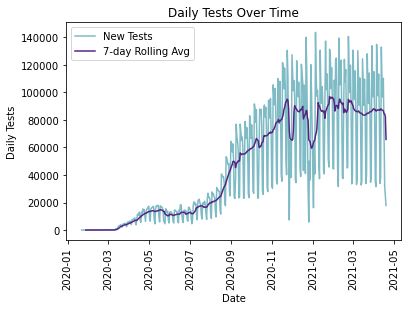

In [17]:
plt.plot(tests['Date'], tests['All Molecular Tests'], alpha = 0.5, color = '#00788c', label = 'New Tests')
plt.plot(tests['Date'], (tests['All Molecular Tests']).rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('Daily Tests Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Tests')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

Lag in testing over the weekend

In [18]:
tests['Day'] = tests['Date'].dt.day_name()

dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tests_by_dow = tests.groupby('Day').agg({'All Positive Molecular Tests': 'sum', 'All Molecular Tests': 'sum'}).reindex(dow_order)

tests_by_dow

,All Positive Molecular Tests,All Molecular Tests
Day,,
Monday,140554.0,4094306.0
Tuesday,132963.0,3815677.0
Wednesday,126454.0,3360471.0
Thursday,114362.0,3501514.0
Friday,109218.0,2962142.0
Saturday,76185.0,1477647.0
Sunday,52771.0,1310954.0


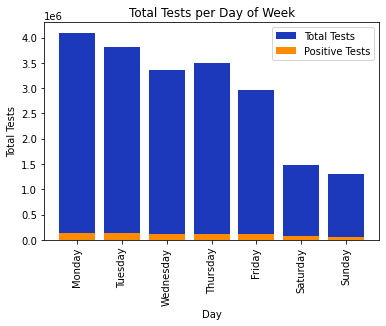

In [19]:
plt.bar(tests_by_dow.index, tests_by_dow['All Molecular Tests'], color = '#1c39bb', label = 'Total Tests')
plt.bar(tests_by_dow.index, tests_by_dow['All Positive Molecular Tests'], color = '#ff8b00', label = 'Positive Tests')
plt.title('Total Tests per Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Tests')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

#### Deaths

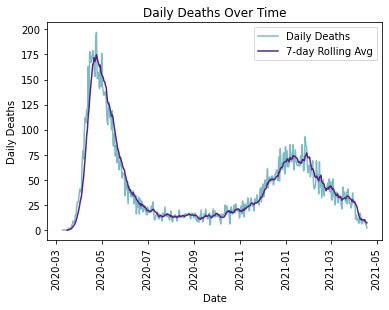

In [20]:
plt.plot(deaths['Date of Death'], deaths['Confirmed Deaths'],alpha = 0.5, color = '#00788c', label = 'Daily Deaths')
plt.plot(deaths['Date of Death'], deaths['Confirmed Deaths'].rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('Daily Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

#### Hospitalisations

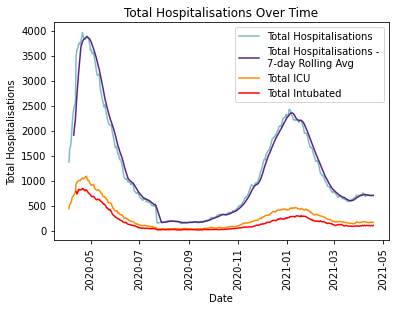

In [21]:
plt.plot(hosptl['Date'], hosptl['Total number of COVID patients in hospital today'], alpha = 0.5, color = '#00788c', label = 'Total Hospitalisations')
plt.plot(hosptl['Date'], hosptl['Total number of COVID patients in hospital today'].rolling(7).mean(), color = '#552583', label = 'Total Hospitalisations -\n7-day Rolling Avg')
plt.plot(hosptl['Date'], hosptl['ICU'], color = '#ff8b00', label = 'Total ICU')
plt.plot(hosptl['Date'], hosptl['Intubated'], color = '#ff0000', label = 'Total Intubated')
plt.title('Total Hospitalisations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Hospitalisations')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

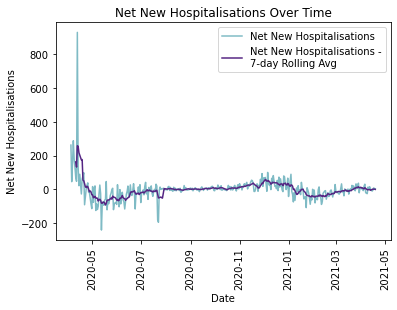

In [22]:
plt.plot(hosptl['Date'], hosptl['Net new number of COVID patients in hospital today'], alpha = 0.5, color = '#00788c', label = 'Net New Hospitalisations')
plt.plot(hosptl['Date'], hosptl['Net new number of COVID patients in hospital today'].rolling(7).mean(), color = '#552583', label = 'Net New Hospitalisations -\n7-day Rolling Avg')
# plt.plot(hosptl['Date'], hosptl['Net New number ICU'], color = '#ff8b00', label = 'Total ICU')
plt.title('Net New Hospitalisations Over Time')
plt.xlabel('Date')
plt.ylabel('Net New Hospitalisations')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

#### Vaccinations

Number of doses administered

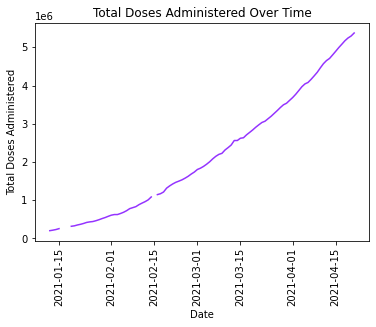

In [36]:
plt.plot(mass_vax['date'], mass_vax['total_vaccinations'], color = '#9433ff')
# plt.yscale('log')
plt.title('Total Doses Administered Over Time')
plt.xlabel('Date')
plt.ylabel('Total Doses Administered')
plt.xticks(rotation = 90)
plt.show()
plt.close()

People fully vaccinated vs total cases over time

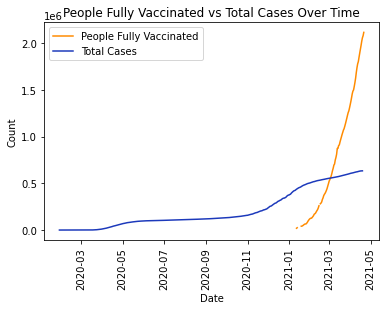

In [45]:
plt.plot(mass_vax['date'], mass_vax['people_fully_vaccinated'], color = '#ff8b00', label = 'People Fully Vaccinated')
plt.plot(cases['Date'], cases['Positive Total'], color = '#1c39bb', label = 'Total Cases')
plt.title('People Fully Vaccinated vs Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

New doses administered - 7-day smoothed

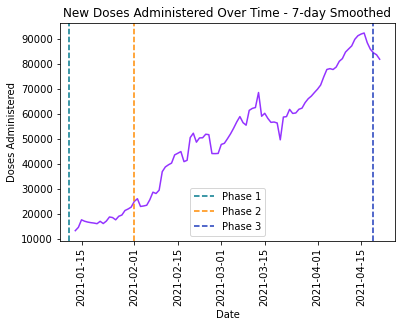

In [49]:
plt.plot(mass_vax['date'], mass_vax['daily_vaccinations'], color = '#9433ff')
plt.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#00788c', label = 'Phase 1')
plt.axvline(pd.to_datetime('2021-02-01'), ls = '--', color = '#ff8b00', label = 'Phase 2')
plt.axvline(pd.to_datetime('2021-04-19'), ls = '--', color = '#1c39bb', label = 'Phase 3')
plt.title('New Doses Administered Over Time - 7-day Smoothed')
plt.xlabel('Date')
plt.ylabel('Doses Administered')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

People fully vaccinated vs at least one dose over time

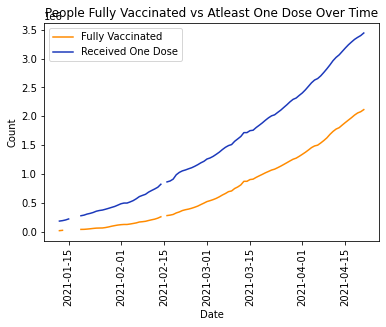

In [47]:
plt.plot(mass_vax['date'], mass_vax['people_fully_vaccinated'], color = '#ff8b00', label = 'Fully Vaccinated')
plt.plot(mass_vax['date'], mass_vax['people_vaccinated'], color = '#1c39bb', label = 'Received One Dose')
plt.title('People Fully Vaccinated vs Atleast One Dose Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()